First download the LoRA weights from https://huggingface.co/dsezer/corgy_dog_LoRA/pytorch_lora_weights.safetensors

Then upload these weights to your Google Drive and mount MyDrive manually. 

In [1]:
# Install dependencies.
!pip install bitsandbytes transformers accelerate peft -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 17.7 MB/s eta 0:00:00


In [2]:
!pip install git+https://github.com/huggingface/diffusers.git -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [6]:
import torch
from diffusers import DiffusionPipeline, AutoencoderKL

vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    vae=vae,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
)
pipe.load_lora_weights('/content/drive/MyDrive', weight_name="pytorch_lora_weights.safetensors")
#pipe.load_lora_weights(repo_id)
_ = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

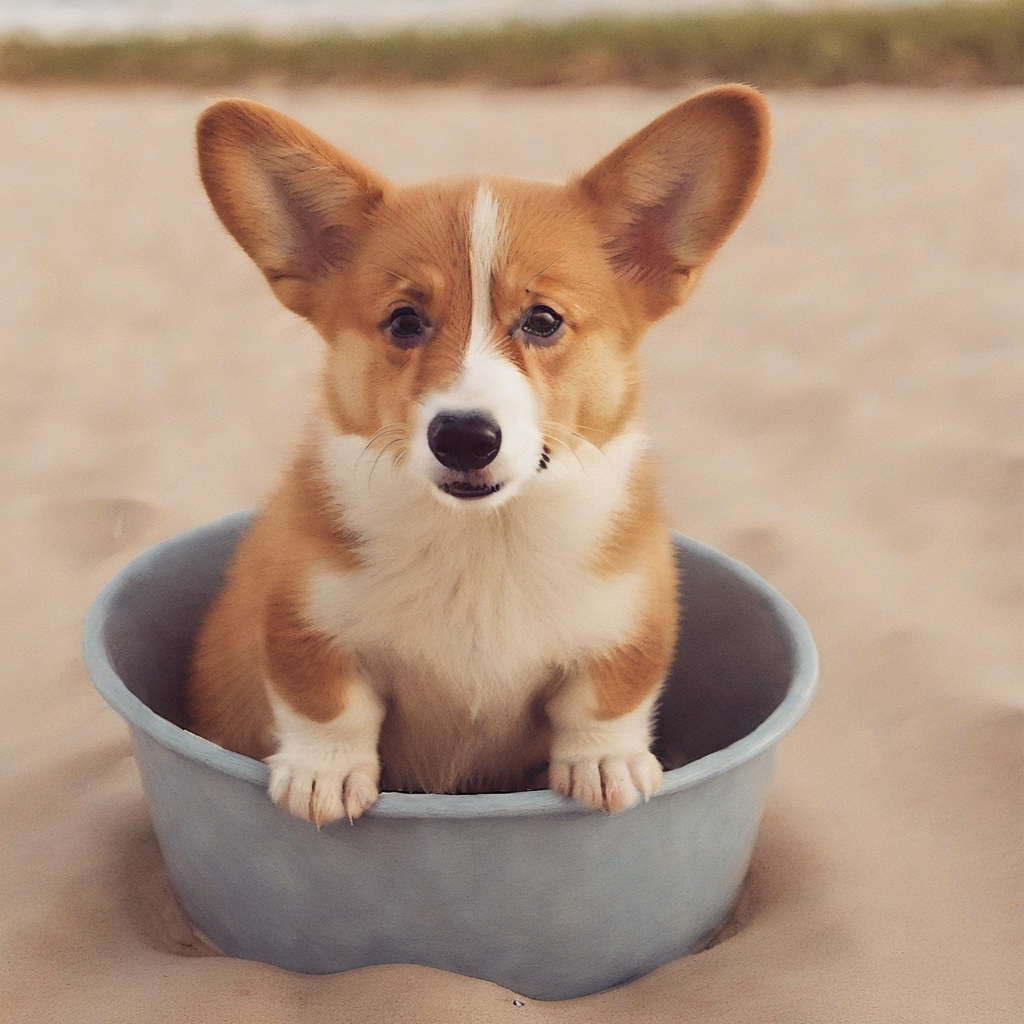

In [9]:
prompt = "A photo of corgy dog in a bucket at the beach"

image = pipe(prompt=prompt, num_inference_steps=25).images[0]
image

  0%|          | 0/25 [00:00<?, ?it/s]

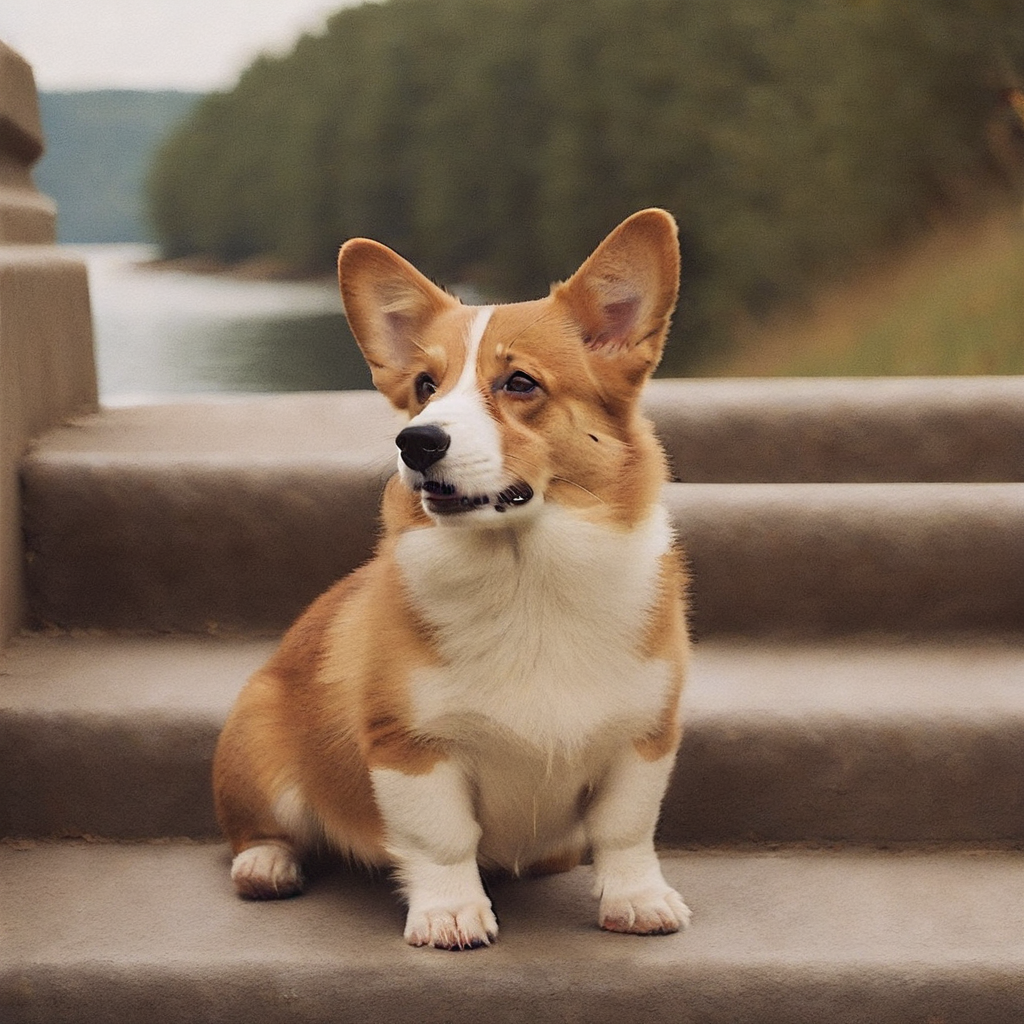

In [10]:
prompt = "A photo of corgy dog on the stairs of a house near a lake"

image = pipe(prompt=prompt, num_inference_steps=25).images[0]
image